# Student data analysis

## Submitted by *Ashmina T.* 

**Objective:** An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information:
1. Find out how many males and females participated in the test.
2. What do you think about the students' parental level of education?
3. Who scores the most on average for math, reading and writing based on  
&emsp;a. Gender  
&emsp;b. Test preparation course
4. What do you think about the scoring variation for math, reading and writing
based on  
&emsp;a. Gender  
&emsp;b. Test preparation course
5. The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the dataset
students_data = pd.read_csv('StudentsPerformance.csv')

In [3]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [4]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 1. Find out how many males and females participated in the test

In [5]:
students_data.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

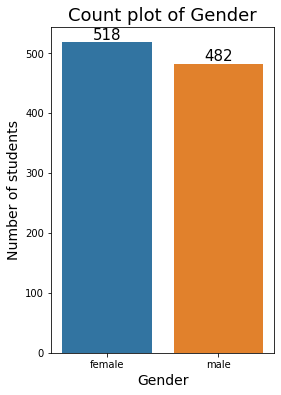

In [6]:
#alternate method
#we can use countplot to get get the number of males and females in the dataset
plt.figure(figsize=(4,6))
gender_plot = sns.countplot(x='gender',data=students_data)
plt.title("Count plot of Gender",fontsize=18)
plt.xlabel("Gender",fontsize=14)
plt.ylabel("Number of students",fontsize=14)
plt.bar_label(gender_plot.containers[0],fontsize=15)
plt.show()

## 2. What do you think about the students' parental level of education?

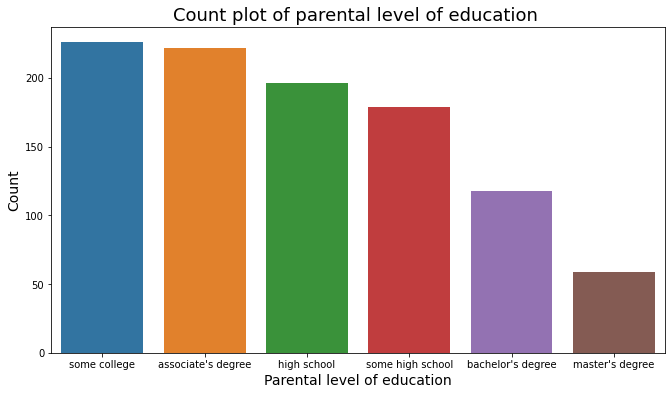

In [7]:
#countplot of parental level education
plt.figure(figsize=(11,6))
sns.countplot(x='parental level of education',data=students_data,order=students_data['parental level of education'].value_counts().index)
plt.title("Count plot of parental level of education ",fontsize=18)
plt.xlabel("Parental level of education",fontsize=14)
plt.ylabel("Count",fontsize=14)
#plt.bar_label(gender_plot.containers[0],fontsize=15)
plt.show()

Most of the parents are having some college level of education. And only few of the parents are having master's degree as their educational qualification.

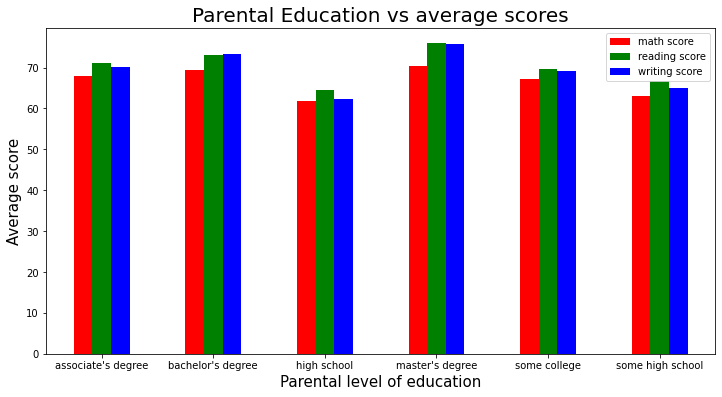

In [8]:
#grouping scores based on parent's education and calculating the mean
grouped_data1 = students_data.groupby('parental level of education')[['parental level of education','math score','reading score','writing score']].mean()
#plotting grouped data using bar plot
grouped_data1.plot(kind='bar',color = ['red','green','blue'],figsize=(12,6))
plt.title('Parental Education vs average scores', fontsize = 20)
plt.xlabel("Parental level of education",fontsize=15)
plt.ylabel("Average score",fontsize=15)
plt.xticks(rotation=0)
plt.show()

The average score in all the three categories(math score, reading score, writing score) is high for students whose parents are qualified with master's degree, and is comparatively low for students whose parents having only high school qualification. This shows that parents' educational qualification is having a positive impact on the student's performance.

## 3.a. Who scores the most on average for math, reading and writing based on Gender?

In [9]:
#grouping data based on gender and calculating the average scores in each category
students_data.groupby('gender').agg(average_math_score=('math score','mean'),average_reading_score=('reading score','mean'),average_writing_score=('writing score','mean'))

,average_math_score,average_reading_score,average_writing_score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


Males scored the most on average for math, and females scored the most on average for both reading and writing.

## 3.b. Who scores the most on average for math, reading and writing based on Test preparation course?

In [10]:
#grouping the data based on whether test preparation course completed or not and calculating the average scores
students_data.groupby('test preparation course').agg(average_math_score=('math score','mean'),average_reading_score=('reading score','mean'),average_writing_score=('writing score','mean'))

,average_math_score,average_reading_score,average_writing_score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


Average scores in all the three categories(math score, reading score,writing score) are high for the students who have completed the test preparation course.

## 4.a. What do you think about the scoring variation for math, reading and writing based on Gender?

In [11]:
#grouping the data based on gender and measuring the varience in the scores
students_data.groupby('gender').agg(varience_math_score=('math score','var'),varience_reading_score=('reading score','var'),varience_writing_score=('writing score','var'))

,varience_math_score,varience_reading_score,varience_writing_score
gender,,,
female,256.958593,207.677438,220.369327
male,211.889097,200.211010,202.413924


In all the 3 subjects(math, reading, writing), variation in scoring is comparatively low in males than females. So, it can be concluded that males are more consistant in scoring than females.

## 4.b. What do you think about the scoring variation for math, reading and writing based on Test preparation course? 

In [12]:
#grouping the data based on whether the test preparation course completed or not and calculating the varience
students_data.groupby('test preparation course').agg(varience_math_score=('math score','var'),varience_reading_score=('reading score','var'),varience_writing_score=('writing score','var'))

,varience_math_score,varience_reading_score,varience_writing_score
test preparation course,,,
completed,210.884027,183.265864,175.202612
none,246.668662,213.419851,226.251739


In all the 3 subjects(math, reading, writing), the variation in scoring is comparatively low for those who completed the test preparation course. It shows that the students who completed test preparation course are more consistent in scoring than those who didn't.

## 5. The management needs your help to give bonus points to the top 25% of students based on their maths score

In [13]:
#calculating number of students to whom the bonus point is to be given
n = int(0.25*len(students_data))
n

250

In [14]:
#top 25% lies after the third quartile(after the 75th percentile)
#finding the 75th percentile of math score
q3=np.percentile(students_data['math score'],75,axis=0)
q3

77.0

In [15]:
#75th percentile is 77
top25 = students_data[students_data['math score']>q3]
len(top25)

231

We have to give bonus to 250(25%) students ,but only 231 students are above 75th percentile. 

In [16]:
#including students with 75percentile also to the bonus category
top25 =  students_data[students_data['math score']>=q3]
len(top25)

255

Here we got 255 students, that is more than 25%. This is because there are many students who scored 77 in math. By using df.head(250) we can take  250 students from the above 255 , but that seems unfair.  
For the fair selection of top 25% , we have to sort the data first based on math score and then by total marks(math score,reading score and writing score)

In [17]:
#alternate method
#creating a new column Total marks containing the sum of all the three scores of a student
students_data["Total marks"] = students_data['math score']+students_data['reading score']+students_data['writing score']
#sorting the data by math score followed by total marks
new_data=students_data.sort_values(by=['math score','Total marks'],ascending=False)
#retrieving the top 25% students to whom the bonus points is to be given
new_data[:n]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks
516,female,group E,bachelor's degree,standard,none,100,100,100,300
517,female,group E,associate's degree,standard,none,100,100,100,300
999,male,group E,bachelor's degree,standard,completed,100,100,100,300
997,male,group D,some college,standard,completed,100,97,99,296
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293
...,...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77,230
853,male,group D,associate's degree,free/reduced,none,77,78,73,228
427,female,group D,associate's degree,standard,none,77,77,73,227
426,female,group D,some college,standard,none,77,68,77,222


In [18]:
#creating a new column for bonus point confirmation
students_data["Bonus Point"]="NO"
students_data.loc[new_data.head(250).index,'Bonus Point']= "YES"
students_data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Bonus Point
995,male,group E,some college,standard,completed,99,87,81,267,YES
996,male,group A,some college,standard,completed,100,96,86,282,YES
997,male,group D,some college,standard,completed,100,97,99,296,YES
998,male,group E,associate's degree,free/reduced,completed,100,100,93,293,YES
999,male,group E,bachelor's degree,standard,completed,100,100,100,300,YES


In [19]:
students_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total marks,Bonus Point
0,female,group C,some high school,free/reduced,none,0,17,10,27,NO
1,female,group B,high school,free/reduced,none,8,24,23,55,NO
2,female,group B,some high school,free/reduced,none,18,32,28,78,NO
3,female,group B,some college,standard,none,11,38,32,81,NO
4,female,group C,some college,free/reduced,none,22,39,33,94,NO
